# Count and Analyze Text in the Torgo dataset

(updated on June 24, 2024 to include plots to demonstrate the effect of f)

In this version, the prompt are analyzed together for all speakers instead of a per-speaker basis. The resulting effect of the prompt-split is then analyzed per speaker.

# Preparation before Analysis

## Download the csv file

In [1]:
# For saving images in Excel
%pip install XlsxWriter
%pip install ortools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.3/309.3 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.2 which is incompatible.
google-ai-generativelanguage 0.6.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!

In [2]:
# Download "output.csv" (including control speakers)
!gdown 1aIhFAs5x9CIIU6GQp_qcg2GydxYpuZA4

Downloading...
From: https://drive.google.com/uc?id=1aIhFAs5x9CIIU6GQp_qcg2GydxYpuZA4
To: /content/output.csv
100% 1.75M/1.75M [00:00<00:00, 103MB/s]


In [3]:
import pandas as pd
import numpy as np
from ortools.linear_solver import pywraplp
from typing import Tuple

# Analyze the Dataset

In [4]:
data = pd.read_csv('output.csv')
total_prompt_count = len(data)
print(f"Total Prompt Count: {total_prompt_count}")

print("")
data

Total Prompt Count: 16394



,session,audio,text,speaker_id
0,F01-Session1-arrayMic-0006,/content/downloads/Torgo/F01/Session1/wav_arra...,STICK,F01
1,F01-Session1-arrayMic-0008,/content/downloads/Torgo/F01/Session1/wav_arra...,EXCEPT IN THE WINTER WHEN THE OOZE OR SNOW OR ...,F01
2,F01-Session1-arrayMic-0009,/content/downloads/Torgo/F01/Session1/wav_arra...,PAT,F01
3,F01-Session1-arrayMic-0010,/content/downloads/Torgo/F01/Session1/wav_arra...,UP,F01
4,F01-Session1-arrayMic-0011,/content/downloads/Torgo/F01/Session1/wav_arra...,MEAT,F01
...,...,...,...,...
16389,MC04-Session2-arrayMic-1022,/content/downloads/Torgo/MC04/Session2/wav_arr...,WART,MC04
16390,MC04-Session2-arrayMic-1023,/content/downloads/Torgo/MC04/Session2/wav_arr...,THE FAMILY REQUESTS THAT FLOWERS BE OMITTED,MC04
16391,MC04-Session2-arrayMic-1024,/content/downloads/Torgo/MC04/Session2/wav_arr...,SHIP,MC04
16392,MC04-Session2-arrayMic-1026,/content/downloads/Torgo/MC04/Session2/wav_arr...,WHY,MC04


## Process/analyze the csv file

In [5]:
# Group the text by the 'speaker_id'
data_grouped = data.groupby('text')['speaker_id'].apply(list).reset_index()
unique_texts = data_grouped['text'].unique()
unique_speakers = data['speaker_id'].unique()

In [6]:
# Create a table and count the number of times each speaker has spoken it
output_table = pd.DataFrame({'Text': unique_texts})

for speaker in unique_speakers:
    output_table[speaker] = [0 for _ in range(len(unique_texts))]

output_table['All'] = [0 for _ in range(len(unique_texts))]

for index, row in data_grouped.iterrows():
    text = row['text']
    speakers = row['speaker_id']
    for speaker in speakers:
        output_table.at[index, speaker] += 1
        output_table.at[index, 'All'] += 1

output_table.to_csv('torgo_count.csv')

print("Output Table")
print("-------------------------------------")
print("Combined repeated text and counted the occurrence of each unique text per speaker\n")
output_table

Output Table
-------------------------------------
Combined repeated text and counted the occurrence of each unique text per speaker



,Text,F01,F03,F04,FC01,FC02,FC03,M01,M02,M03,M04,M05,MC01,MC02,MC03,MC04,All
0,A,0,0,0,0,2,2,0,0,0,0,1,2,2,2,2,13
1,A FEW MAY BE HARD TO FIND,0,0,0,0,2,2,0,0,0,0,0,2,0,0,1,7
2,A FIRE IN STRAW MAKES A QUICK BLAZE,0,0,0,0,2,2,0,0,0,0,0,2,1,2,1,10
3,A GOOD ATTITUDE IS UNBEATABLE,0,2,2,0,2,2,0,2,0,0,1,2,1,2,2,18
4,A LARGE HOUSEHOLD NEEDS LOTS OF APPLIANCES,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,YOUNG AND OLD ALSO GOT TOGETHER,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,4
953,YOUNG PEOPLE PARTICIPATE IN ATHLETIC ACTIVITIES,0,2,0,0,2,2,0,0,0,0,0,2,1,2,2,13
954,ZERO,0,2,2,0,6,6,2,2,2,0,1,6,3,6,4,42
955,ZIP,0,4,2,0,2,2,0,0,0,0,1,2,2,2,2,19


## Basic statistics

In [7]:
# Count the number of text entry by speaker

print(f"Total Text Entries: {len(data)}")
print(f"Unique Text Entries: {len(output_table)}")

unique_texts_per_speaker = []
total_texts_per_speaker = []

for speaker in unique_speakers:
    count = (output_table[speaker] >= 1).sum()
    unique_texts_per_speaker.append(count)

for speaker in unique_speakers:
    count = output_table[speaker].sum()
    total_texts_per_speaker.append(count)

unique_texts_df = pd.DataFrame(
    {'Speaker': unique_speakers, 'Unique Texts': unique_texts_per_speaker})
total_texts_df = pd.DataFrame(
    {'Speaker': unique_speakers, 'Total Texts': total_texts_per_speaker})

Total Text Entries: 16394
Unique Text Entries: 957


In [8]:
print("Unique Text per Speaker")
print("-----------------------")
unique_texts_df

Unique Text per Speaker
-----------------------


,Speaker,Unique Texts
0,F01,94
1,F03,423
2,F04,351
3,FC01,128
4,FC02,898
5,FC03,695
6,M01,319
7,M02,333
8,M03,345
9,M04,228


In [9]:
print("Total Text per Speaker")
print("----------------------")
total_texts_df

Total Text per Speaker
----------------------


,Speaker,Total Texts
0,F01,228
1,F03,1075
2,F04,667
3,FC01,294
4,FC02,2176
5,FC03,1908
6,M01,739
7,M02,766
8,M03,800
9,M04,652


## Save results in .csv file

In [10]:
!mkdir results
output_table.to_csv('./results/torgo_unique_count_all.csv')

## Filter By Phrase / Isolated Word

In [11]:
output_table_word = output_table[output_table['Text'].apply(
    lambda x: len(x.split()) == 1)].reset_index(drop=True)
output_table_word.to_csv('./results/torgo_unique_count_word.csv')
output_table_word

,Text,F01,F03,F04,FC01,FC02,FC03,M01,M02,M03,M04,M05,MC01,MC02,MC03,MC04,All
0,A,0,0,0,0,2,2,0,0,0,0,1,2,2,2,2,13
1,ABLE,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,4
2,ABSURD,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2
3,ACHE,0,0,0,0,8,8,0,0,0,0,0,8,0,4,4,32
4,ACHES,0,0,0,0,2,2,0,0,0,0,0,2,0,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,YANKEE,0,2,0,0,2,2,0,0,2,0,1,2,1,2,2,16
611,YES,2,8,5,4,8,10,6,6,6,5,5,12,7,10,10,104
612,ZERO,0,2,2,0,6,6,2,2,2,0,1,6,3,6,4,42
613,ZIP,0,4,2,0,2,2,0,0,0,0,1,2,2,2,2,19


In [12]:
output_table_phrase = output_table[output_table['Text'].apply(
    lambda x: len(x.split()) > 1)].reset_index(drop=True)
output_table_phrase.to_csv('./results/torgo_unique_count_phrase.csv')
output_table_phrase

,Text,F01,F03,F04,FC01,FC02,FC03,M01,M02,M03,M04,M05,MC01,MC02,MC03,MC04,All
0,A FEW MAY BE HARD TO FIND,0,0,0,0,2,2,0,0,0,0,0,2,0,0,1,7
1,A FIRE IN STRAW MAKES A QUICK BLAZE,0,0,0,0,2,2,0,0,0,0,0,2,1,2,1,10
2,A GOOD ATTITUDE IS UNBEATABLE,0,2,2,0,2,2,0,2,0,0,1,2,1,2,2,18
3,A LARGE HOUSEHOLD NEEDS LOTS OF APPLIANCES,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2
4,A LONG FLOWING BEARD CLINGS TO HIS CHIN,2,2,1,2,1,2,4,2,2,3,2,2,2,2,2,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,YOU WISHED TO KNOW ALL ABOUT MY GRANDFATHER,2,2,1,2,1,2,2,2,2,3,2,2,2,2,2,29
338,YOU'D BE BETTER OFF TAKING A COLD SHOWER,0,2,2,0,1,2,2,2,2,2,1,2,2,2,4,26
339,YOU'RE USED TO BEING ON THE FIELD,0,2,1,0,1,2,2,2,2,2,1,2,2,2,2,23
340,YOUNG AND OLD ALSO GOT TOGETHER,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,4


# Split Prompts into Train and Test Sets

## Apply Linear Programming to Split Prompts into Train and Test Sets

*   Set test set to be at most 30% of (train + valid + test) per test speaker
*   Each prompt can only be either train or test set, and to be consistent throughout all test speakers



In [13]:
def split_prompts_into_train_and_test_sets(output_table: pd.DataFrame, target_retain_ratio: float) -> Tuple[pd.DataFrame, pd.DataFrame]:
    '''
    Split prompts into train and test sets using linear programming.

    Args:
        output_table (pd.DataFrame): The output table containing the prompts and their counts.
        target_retain_ratio (float): The target minimum ratio of prompts to retain in each of the train and test sets.

    Returns:
        new_output_table (pd.DataFrame): The new output table containing the split designations 'Train' and 'Test'.
        summary (pd.DataFrame): A summary of the split.
    '''

    solver = pywraplp.Solver.CreateSolver('SCIP')

    # Create a dataframe to save the results
    summary = pd.DataFrame(columns=['train_with_overlap', 'train_without_overlap', 'train_ratio', 'test_with_overlap', 'test_without_overlap', 'test_ratio', 'total_with_overlap', 'total_without_overlap', 'total_ratio', '(train/total)', '(test/total)'])

    # Convert output_table into a matrix
    prompt_list = output_table.to_numpy()
    all_speakers = [speaker for speaker in output_table.columns[1:-1]]
    target_speakers = [speaker for speaker in all_speakers if 'C' not in speaker]

    '''
    Variables
    '''
    # Variables: use a list to keep track of whether each prompt is in test set
    test_set = [solver.IntVar(0, 1, f'test_{i}') for i in range(len(prompt_list))]

    '''
    Constraints
    '''
    # Constraints: Set the maximum ratio of train to test prompts for each target speaker
    for speaker_idx, speaker in enumerate(all_speakers):
        if speaker in target_speakers:
            target_speaker_idx = output_table.columns.get_loc(speaker)

            # Data count with repetition
            train_count_original = solver.Sum(sum(prompt_list[i][speaker_idx_ + 1] for speaker_idx_, speaker_ in enumerate(all_speakers) if speaker_ != speaker) for i in range(len(prompt_list)))
            test_count_original = solver.Sum(prompt_list[i][target_speaker_idx] for i in range(len(prompt_list)))

            # Data count without repetition (apply booleans from test_set)
            train_count = solver.Sum((1 - test_set[i]) * sum(prompt_list[i][speaker_idx_ + 1] for speaker_idx_, speaker_ in enumerate(all_speakers) if speaker_ != speaker) for i in range(len(prompt_list)))
            test_count = solver.Sum([test_set[i] * prompt_list[i][target_speaker_idx] for i in range(len(prompt_list))])

            # Constraint
            # solver.Add(train_count >= target_retain_ratio * train_count_original)
            solver.Add(test_count >= target_retain_ratio * test_count_original)
            solver.Add((train_count + test_count) >= target_retain_ratio * (test_count_original + test_count_original))

    '''
    Objective
    '''
    # Objective for train set: Maximize the total number of prompts for all speakers except the target speaker in the training set
    train_objective = solver.Sum((1 - test_set[i]) * sum(prompt_list[i][speaker_idx_ + 1] for speaker_idx_, speaker_ in enumerate(all_speakers) if speaker_ != speaker) for i in range(len(prompt_list)))

    # Objective for test set: Maximize the total number of prompts for the target speaker in the test set
    test_objective = solver.Sum([test_set[i] * prompt_list[i][target_speaker_idx + 1] for i in range(len(prompt_list))])

    # Combine both objectives
    solver.Maximize(train_objective + test_objective)

    '''
    Solve
    '''
    status = solver.Solve()

    '''
    Statistics
    '''
    if status == pywraplp.Solver.OPTIMAL:
        test_prompt_count = round(solver.Objective().Value())

        # Sort the prompts into a test_set_list
        test_set_list = []
        train_set_list = []
        for i in range(len(prompt_list)):
            if test_set[i].solution_value() == 1:
                test_set_list.append(prompt_list[i][0])
            else:
                train_set_list.append(prompt_list[i][0])

        print(f"Train set prompts ({len(train_set_list)}): {train_set_list}")
        print(f"Test set prompts ({len(test_set_list)}): {test_set_list}")
        print()

        # Print the solution / summary
        for speaker_idx, speaker in enumerate(all_speakers):
            if speaker in target_speakers:
                target_speaker_idx = output_table.columns.get_loc(speaker)

                # Data count with repetition
                train_count_original = int(sum(sum(prompt_list[i][speaker_idx_ + 1] for speaker_idx_, speaker_ in enumerate(all_speakers) if speaker_ != speaker) for i in range(len(prompt_list))))
                test_count_original = int(sum(prompt_list[i][target_speaker_idx] for i in range(len(prompt_list))))
                total_count_original = train_count_original + test_count_original

                # Data count without repetition (apply booleans from test_set)
                train_count = int(sum((1 - test_set[i].solution_value()) * sum(prompt_list[i][speaker_idx_ + 1] for speaker_idx_, speaker_ in enumerate(all_speakers) if speaker_ != speaker) for i in range(len(prompt_list))))
                test_count = int(sum(test_set[i].solution_value() * prompt_list[i][target_speaker_idx] for i in range(len(prompt_list))))
                total_count = train_count + test_count

                summary.loc[speaker, 'train_with_overlap'] = train_count_original
                summary.loc[speaker, 'train_without_overlap'] = train_count
                summary.loc[speaker, 'train_ratio'] = train_count / train_count_original
                summary.loc[speaker, 'test_with_overlap'] = test_count_original
                summary.loc[speaker, 'test_without_overlap'] = test_count
                summary.loc[speaker, 'test_ratio'] = test_count / test_count_original
                summary.loc[speaker, 'total_with_overlap'] = total_count_original
                summary.loc[speaker, 'total_without_overlap'] = total_count
                summary.loc[speaker, 'total_ratio'] = total_count / total_count_original
                summary.loc[speaker, '(train/total)'] = train_count / total_count
                summary.loc[speaker, '(test/total)'] = test_count / total_count

        # Append a new column 'test_data' and assign either 1 or 0 based on the
        # test_set_list
        new_output_table = output_table.copy()
        new_output_table['test_data'] = 0
        new_output_table.loc[new_output_table['Text'].isin(
            test_set_list), 'test_data'] = 1

        return new_output_table, summary

    print('No solutions found')
    return output_table, summary

In [14]:
# Split the prompts for isolated words and phrases separately into train and test sets

print("Summary for Isolated Word Split")
print("----------------------------------")
# Retain AT LEAST 55% of both the train and test sets with repetitions
output_table_word_split, summary_word_split = split_prompts_into_train_and_test_sets(
    output_table_word, 0.55)

print()

print("Summary for Phrase Split")
print("----------------------------------")
output_table_phrase_split, summary_phrase_split = split_prompts_into_train_and_test_sets(
    output_table_phrase, 0.55)

Summary for Isolated Word Split
----------------------------------
Train set prompts (451): ['A', 'ABLE', 'ABSURD', 'ACHE', 'ACHES', 'ADD', 'AID', 'AIL', 'AIR', 'ALL', 'AND', 'APE', 'ARE', 'AREA', 'ARM', 'ASH', 'AT', 'ATE', 'BACK', 'BALL', 'BAN', 'BANK', 'BASH', 'BEAM', 'BEAST', 'BEAT', 'BED', 'BEEF', 'BEEP', 'BEG', 'BEND', 'BENDER', 'BEST', 'BIG', 'BILL', 'BIN', 'BLEND', 'BLOAT', 'BLOW', 'BOAST', 'BOAT', 'BOG', 'BOOK', 'BOONE', 'BOOT', 'BOOTH', 'BORN', 'BOTH', 'BOUGHT', 'BOWL', 'BRAIN', 'BREAD', 'BULL', 'BUMPER', 'BUN', 'BUNCH', 'BURN', 'BUST', 'BUT', 'CABLE', 'CAKE', 'CAKES', 'CALL', 'CASH', 'CAT', 'CATCH', 'CENTER', 'CHAP', 'CHARM', 'CHEER', 'CHEESE', 'CHOP', 'COAT', 'CODE', 'COLD', 'CONSERVE', 'CONTRACT', 'CONTRAST', 'CONVERGE', 'COPE', 'CORK', 'CORN', 'COUPE', 'CRAWL', 'CREATURE', 'DAMP', 'DARN', 'DASH', 'DEAD', 'DEER', 'DELTA', 'DEPRESS', 'DESERVE', 'DIAL', 'DILL', 'DOCK', 'DOCKS', 'DOWN', 'DROP', 'DUCK', 'DUG', 'DUSK', 'EACH', 'EASE', 'EAT', 'EIGHT', 'EMBER', 'END', 'EYES', 'FAB

In [15]:
print("Summary for Isolated Word Split")
print("----------------------------------")
summary_word_split

Summary for Isolated Word Split
----------------------------------


,train_with_overlap,train_without_overlap,train_ratio,test_with_overlap,test_without_overlap,test_ratio,total_with_overlap,total_without_overlap,total_ratio,(train/total),(test/total)
F01,12045,7497,0.622416,188,104,0.553191,12233,7601,0.621352,0.986318,0.013682
F03,11435,7222,0.63157,798,439,0.550125,12233,7661,0.626257,0.942697,0.057303
F04,11735,7357,0.626928,498,274,0.550201,12233,7631,0.623804,0.964094,0.035906
M01,11672,7329,0.627913,561,309,0.550802,12233,7638,0.624377,0.959544,0.040456
M02,11651,7320,0.628272,582,321,0.551546,12233,7641,0.624622,0.95799,0.04201
M03,11623,7307,0.628667,610,336,0.55082,12233,7643,0.624785,0.956038,0.043962
M04,11732,7356,0.627003,501,276,0.550898,12233,7632,0.623886,0.963836,0.036164
M05,11792,7383,0.626102,441,243,0.55102,12233,7626,0.623396,0.968135,0.031865


In [16]:
print("Summary for Phrase Split")
print("----------------------------------")
summary_phrase_split

Summary for Phrase Split
----------------------------------


,train_with_overlap,train_without_overlap,train_ratio,test_with_overlap,test_without_overlap,test_ratio,total_with_overlap,total_without_overlap,total_ratio,(train/total),(test/total)
F01,4121,2733,0.663189,40,22,0.55,4161,2755,0.6621,0.992015,0.007985
F03,3884,2627,0.676365,277,153,0.552347,4161,2780,0.668109,0.944964,0.055036
F04,3992,2675,0.67009,169,93,0.550296,4161,2768,0.665225,0.966402,0.033598
M01,3983,2671,0.6706,178,98,0.550562,4161,2769,0.665465,0.964608,0.035392
M02,3977,2669,0.671109,184,102,0.554348,4161,2771,0.665946,0.96319,0.03681
M03,3971,2667,0.671619,190,106,0.557895,4161,2773,0.666426,0.961774,0.038226
M04,4010,2684,0.669327,151,84,0.556291,4161,2768,0.665225,0.969653,0.030347
M05,4029,2692,0.668156,132,73,0.55303,4161,2765,0.664504,0.973599,0.026401


In [17]:
# Combine the two tables back together
output_table_split = pd.concat([output_table_word_split, output_table_phrase_split], axis=0)

# Match the indices with the original output_table of the same prompt
print("New Output Table with Split")
print("----------------------------------")
data_copy = data.copy()
data_copy = data_copy.set_index('text')
output_table_split = output_table_split.set_index('Text')
output_table_split = output_table_split.reindex(data_copy.index)
output_table_split = output_table_split.reset_index()

output_table_split

New Output Table with Split
----------------------------------


,text,F01,F03,F04,FC01,FC02,FC03,M01,M02,M03,M04,M05,MC01,MC02,MC03,MC04,All,test_data
0,STICK,2,2,1,2,1,2,2,2,2,3,2,2,2,2,2,29,1
1,EXCEPT IN THE WINTER WHEN THE OOZE OR SNOW OR ...,2,2,2,2,1,2,2,2,2,3,2,2,2,2,2,30,1
2,PAT,2,4,2,2,9,10,4,4,4,5,3,10,4,7,7,77,0
3,UP,2,4,1,2,3,4,2,2,2,3,5,4,4,4,6,48,1
4,MEAT,4,4,1,2,9,10,2,2,4,3,2,10,5,10,8,76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16389,WART,0,0,0,0,2,2,0,0,0,0,0,2,0,0,1,7,0
16390,THE FAMILY REQUESTS THAT FLOWERS BE OMITTED,0,0,0,0,2,2,0,0,0,0,0,2,0,0,1,7,0
16391,SHIP,2,2,1,2,7,8,2,2,2,3,3,8,5,6,7,60,0
16392,WHY,0,0,0,0,2,0,0,0,0,0,0,2,0,0,1,5,0


In [18]:
# Combine the first three columns in summary_word_split and summary_phrase_split
# Recalculate ratios
summary_split = summary_word_split
summary_split['train_with_overlap'] += summary_phrase_split['train_with_overlap']
summary_split['train_without_overlap'] += summary_phrase_split['train_without_overlap']
summary_split['test_with_overlap'] += summary_phrase_split['test_with_overlap']
summary_split['test_without_overlap'] += summary_phrase_split['test_without_overlap']
summary_split['total_with_overlap'] += summary_phrase_split['total_with_overlap']
summary_split['total_without_overlap'] += summary_phrase_split['total_without_overlap']

summary_split['train_ratio'] = summary_split['train_without_overlap'] / summary_split['train_with_overlap']
summary_split['test_ratio'] = summary_split['test_without_overlap'] / summary_split['test_with_overlap']
summary_split['total_ratio'] = summary_split['total_without_overlap'] / summary_split['total_with_overlap']

summary_split['(train/total)'] = summary_split['train_without_overlap'] / summary_split['total_without_overlap']
summary_split['(test/total)'] = summary_split['test_without_overlap'] / summary_split['total_without_overlap']

summary_split

,train_with_overlap,train_without_overlap,train_ratio,test_with_overlap,test_without_overlap,test_ratio,total_with_overlap,total_without_overlap,total_ratio,(train/total),(test/total)
F01,16166,10230,0.63281,228,126,0.552632,16394,10356,0.631695,0.987833,0.012167
F03,15319,9849,0.642927,1075,592,0.550698,16394,10441,0.636879,0.9433,0.0567
F04,15727,10032,0.637884,667,367,0.550225,16394,10399,0.634317,0.964708,0.035292
M01,15655,10000,0.638774,739,407,0.550744,16394,10407,0.634805,0.960892,0.039108
M02,15628,9989,0.639173,766,423,0.552219,16394,10412,0.63511,0.959374,0.040626
M03,15594,9974,0.639605,800,442,0.5525,16394,10416,0.635354,0.957565,0.042435
M04,15742,10040,0.637784,652,360,0.552147,16394,10400,0.634378,0.965385,0.034615
M05,15821,10075,0.636812,573,316,0.551483,16394,10391,0.633829,0.969589,0.030411


# Save the results to .csv Files



In [19]:
# Add 'test' column to dataset 'data'
torgo_dataset = data.copy()
torgo_dataset['test_data'] = output_table_split['test_data']

# Save to .csv file
torgo_dataset.to_csv('results/dataset_all.csv', index=False)
torgo_dataset

,session,audio,text,speaker_id,test_data
0,F01-Session1-arrayMic-0006,/content/downloads/Torgo/F01/Session1/wav_arra...,STICK,F01,1
1,F01-Session1-arrayMic-0008,/content/downloads/Torgo/F01/Session1/wav_arra...,EXCEPT IN THE WINTER WHEN THE OOZE OR SNOW OR ...,F01,1
2,F01-Session1-arrayMic-0009,/content/downloads/Torgo/F01/Session1/wav_arra...,PAT,F01,0
3,F01-Session1-arrayMic-0010,/content/downloads/Torgo/F01/Session1/wav_arra...,UP,F01,1
4,F01-Session1-arrayMic-0011,/content/downloads/Torgo/F01/Session1/wav_arra...,MEAT,F01,0
...,...,...,...,...,...
16389,MC04-Session2-arrayMic-1022,/content/downloads/Torgo/MC04/Session2/wav_arr...,WART,MC04,0
16390,MC04-Session2-arrayMic-1023,/content/downloads/Torgo/MC04/Session2/wav_arr...,THE FAMILY REQUESTS THAT FLOWERS BE OMITTED,MC04,0
16391,MC04-Session2-arrayMic-1024,/content/downloads/Torgo/MC04/Session2/wav_arr...,SHIP,MC04,0
16392,MC04-Session2-arrayMic-1026,/content/downloads/Torgo/MC04/Session2/wav_arr...,WHY,MC04,0


In [20]:
# Save the dataset with just training data
torgo_dataset_train = torgo_dataset[torgo_dataset['test_data'] == 0]
torgo_dataset_train = torgo_dataset_train.drop(columns=['test_data'])
torgo_dataset_train.to_csv('results/dataset_train.csv', index=False)
torgo_dataset_train

,session,audio,text,speaker_id
2,F01-Session1-arrayMic-0009,/content/downloads/Torgo/F01/Session1/wav_arra...,PAT,F01
4,F01-Session1-arrayMic-0011,/content/downloads/Torgo/F01/Session1/wav_arra...,MEAT,F01
5,F01-Session1-arrayMic-0012,/content/downloads/Torgo/F01/Session1/wav_arra...,MEAT,F01
7,F01-Session1-arrayMic-0014,/content/downloads/Torgo/F01/Session1/wav_arra...,HE SLOWLY TAKES A SHORT WALK IN THE OPEN AIR E...,F01
8,F01-Session1-arrayMic-0015,/content/downloads/Torgo/F01/Session1/wav_arra...,AIR,F01
...,...,...,...,...
16389,MC04-Session2-arrayMic-1022,/content/downloads/Torgo/MC04/Session2/wav_arr...,WART,MC04
16390,MC04-Session2-arrayMic-1023,/content/downloads/Torgo/MC04/Session2/wav_arr...,THE FAMILY REQUESTS THAT FLOWERS BE OMITTED,MC04
16391,MC04-Session2-arrayMic-1024,/content/downloads/Torgo/MC04/Session2/wav_arr...,SHIP,MC04
16392,MC04-Session2-arrayMic-1026,/content/downloads/Torgo/MC04/Session2/wav_arr...,WHY,MC04


In [21]:
# Save the dataset with just test data
torgo_dataset_test = torgo_dataset[torgo_dataset['test_data'] == 1]
torgo_dataset_test = torgo_dataset_test.drop(columns=['test_data'])
torgo_dataset_test.to_csv('results/dataset_test.csv', index=False)
torgo_dataset_test

,session,audio,text,speaker_id
0,F01-Session1-arrayMic-0006,/content/downloads/Torgo/F01/Session1/wav_arra...,STICK,F01
1,F01-Session1-arrayMic-0008,/content/downloads/Torgo/F01/Session1/wav_arra...,EXCEPT IN THE WINTER WHEN THE OOZE OR SNOW OR ...,F01
3,F01-Session1-arrayMic-0010,/content/downloads/Torgo/F01/Session1/wav_arra...,UP,F01
6,F01-Session1-arrayMic-0013,/content/downloads/Torgo/F01/Session1/wav_arra...,KNOW,F01
10,F01-Session1-arrayMic-0017,/content/downloads/Torgo/F01/Session1/wav_arra...,DOUBLE,F01
...,...,...,...,...
16007,MC04-Session1-headMic-0629,/content/downloads/Torgo/MC04/Session1/wav_hea...,FED,MC04
16051,MC04-Session2-arrayMic-0674,/content/downloads/Torgo/MC04/Session2/wav_arr...,NICE,MC04
16139,MC04-Session2-arrayMic-0765,/content/downloads/Torgo/MC04/Session2/wav_arr...,SPIT,MC04
16367,MC04-Session2-arrayMic-0999,/content/downloads/Torgo/MC04/Session2/wav_arr...,COURT,MC04


In [22]:
# Save the summary tables
summary_word_split.to_csv('results/summary_word_split.csv')
summary_phrase_split.to_csv('results/summary_phrase_split.csv')
summary_split.to_csv('results/summary_all_split.csv')

# Download the Results

In [23]:
# Zip the results and download
import shutil
from google.colab import files
from datetime import datetime

file_name = 'results' + '_' + datetime.now().strftime("%Y%m%d-%H%M%S")
shutil.make_archive(file_name, 'zip', 'results')
files.download(file_name + '.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Experiment with f-values

In [24]:
experiment_summary = []
f_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9, 1.0]

for f in f_values:
    experiment = {"f_value": f}
    experiment_summary.append(experiment)

for experiment in experiment_summary:
    f_value = experiment['f_value']
    print(f"Experiment: f-value={f_value}")
    print("-------------------------------------")
    experiment_output_word, experiment_summary_word = split_prompts_into_train_and_test_sets(
        output_table_word, f_value)

    print(f"Summary for Isolated Word Split (f={f_value})")
    print("----------------------------------")
    print(experiment_summary_word)
    print()

    experiment_output_phrase, experiment_summary_phrase = split_prompts_into_train_and_test_sets(
        output_table_phrase, f_value)

    print(f"Summary for Phrase Split (f={f_value})")
    print("----------------------------------")
    print(experiment_summary_phrase)
    print()

    experiment_output_all = pd.concat([experiment_output_word, experiment_output_phrase], axis=0)
    # Combine the first three columns in summary_word_split and summary_phrase_split
    # Recalculate ratios
    experiment_summary_all = experiment_summary_word
    experiment_summary_all['train_with_overlap'] += experiment_summary_phrase['train_with_overlap']
    experiment_summary_all['train_without_overlap'] += experiment_summary_phrase['train_without_overlap']
    experiment_summary_all['test_with_overlap'] += experiment_summary_phrase['test_with_overlap']
    experiment_summary_all['test_without_overlap'] += experiment_summary_phrase['test_without_overlap']
    experiment_summary_all['total_with_overlap'] += experiment_summary_phrase['total_with_overlap']
    experiment_summary_all['total_without_overlap'] += experiment_summary_phrase['total_without_overlap']

    experiment_summary_all['train_ratio'] = experiment_summary_all['train_without_overlap'] / experiment_summary_all['train_with_overlap']
    experiment_summary_all['test_ratio'] = experiment_summary_all['test_without_overlap'] / experiment_summary_all['test_with_overlap']
    experiment_summary_all['total_ratio'] = experiment_summary_all['total_without_overlap'] / experiment_summary_all['total_with_overlap']

    experiment_summary_all['(train/total)'] = experiment_summary_all['train_without_overlap'] / experiment_summary_all['total_without_overlap']
    experiment_summary_all['(test/total)'] = experiment_summary_all['test_without_overlap'] / experiment_summary_all['total_without_overlap']

    experiment_summary_all

    print("Summary for All Prompts (f={f_value})")
    print("----------------------------------")
    print(experiment_summary_all)
    print()

    experiment["results_word"] = experiment_output_word
    experiment["results_phrase"] = experiment_output_phrase
    experiment["results_all"] = experiment_output_all
    experiment["summary_word"] = experiment_summary_word
    experiment["summary_phrase"] = experiment_summary_phrase
    experiment["summary_all"] = experiment_summary_all

Experiment: f-value=0
-------------------------------------
Train set prompts (615): ['A', 'ABLE', 'ABSURD', 'ACHE', 'ACHES', 'ADD', 'AID', 'AIL', 'AIR', 'ALL', 'ALPHA', 'AND', 'APE', 'ARE', 'AREA', 'ARM', 'ASH', 'AT', 'ATE', 'BACK', 'BAD', 'BAG', 'BALL', 'BAN', 'BANK', 'BARN', 'BASH', 'BAT', 'BEAM', 'BEAR', 'BEAST', 'BEAT', 'BED', 'BEEF', 'BEEP', 'BEG', 'BEND', 'BENDER', 'BEST', 'BETA', 'BIG', 'BILL', 'BIN', 'BIRD', 'BIT', 'BITE', 'BITTEN', 'BITTER', 'BLEND', 'BLOAT', 'BLOW', 'BOAST', 'BOAT', 'BOG', 'BOOK', 'BOONE', 'BOOT', 'BOOTH', 'BORN', 'BOTH', 'BOUGHT', 'BOWL', 'BRAIN', 'BRAN', 'BRAWN', 'BREAD', 'BRIAR', 'BROUGHT', 'BUBBLE', 'BUG', 'BULL', 'BUMPER', 'BUN', 'BUNCH', 'BURN', 'BUST', 'BUT', 'CABLE', 'CAKE', 'CAKES', 'CALL', 'CAR', 'CART', 'CASH', 'CAT', 'CATCH', 'CENTER', 'CHAIR', 'CHAP', 'CHARLIE', 'CHARM', 'CHEER', 'CHEESE', 'CHIP', 'CHOP', 'CITY', 'COAT', 'CODE', 'COLD', 'CONSERVE', 'CONTRACT', 'CONTRAST', 'CONVERGE', 'COPE', 'CORK', 'CORN', 'COUPE', 'COURT', 'CRAWL', 'CREATURE',

In [25]:
# Plot the results vs f-values

experiment_df = pd.DataFrame()
experiment_df['f_value'] = [experiment['f_value'] for experiment in experiment_summary]

# Create column for each speaker
for label in ['train', 'test', 'total']:
    for speaker in ['F01', 'F03', 'F04', 'M01', 'M02', 'M03', 'M04', 'M05']:
        experiment_df[f"{speaker}_{label}"] = [0 for _ in range(len(experiment_df))]
        count = []
        for experiment in experiment_summary:
            count.append(experiment['summary_all'].loc[speaker, f"{label}_without_overlap"])

        experiment_df[f"{speaker}_{label}"] = count

experiment_df

,f_value,F01_train,F03_train,F04_train,M01_train,M02_train,M03_train,M04_train,M05_train,F01_test,...,M04_test,M05_test,F01_total,F03_total,F04_total,M01_total,M02_total,M03_total,M04_total,M05_total
0,0.00,16166,15319,15727,15655,15628,15594,15742,15821,0,...,0,0,16166,15319,15727,15655,15628,15594,15742,15821
1,0.10,15218,14455,14822,14758,14736,14704,14838,14908,24,...,68,59,15242,14563,14889,14833,14816,14786,14906,14967
2,0.20,14165,13488,13814,13757,13736,13707,13829,13890,46,...,134,116,14211,13704,13948,13906,13891,13867,13963,14006
3,0.30,13070,12477,12762,12712,12694,12670,12774,12828,70,...,198,173,13140,12801,12963,12935,12926,12912,12972,13001
4,0.40,11962,11454,11699,11656,11639,11618,11708,11755,92,...,262,230,12054,11885,11967,11953,11946,11938,11970,11985
5,0.50,10822,10399,10603,10568,10553,10537,10611,10650,114,...,327,287,10936,10937,10937,10939,10936,10938,10938,10937
6,0.55,10230,9849,10032,10000,9989,9974,10040,10075,126,...,360,316,10356,10441,10399,10407,10412,10416,10400,10391
7,0.60,9623,9284,9447,9419,9410,9393,9454,9485,138,...,393,345,9761,9930,9848,9864,9873,9873,9847,9830
8,0.70,8356,8102,8225,8208,8197,8185,8229,8253,160,...,457,402,8516,8855,8693,8731,8736,8746,8686,8655
9,0.80,6958,6788,6870,6856,6850,6842,6876,6888,184,...,526,459,7142,7649,7405,7449,7464,7482,7402,7347


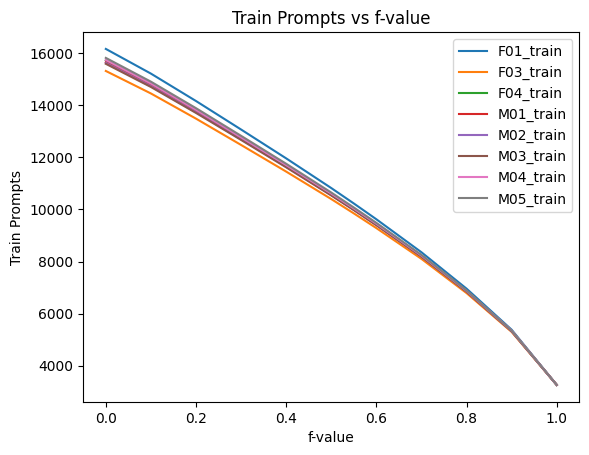

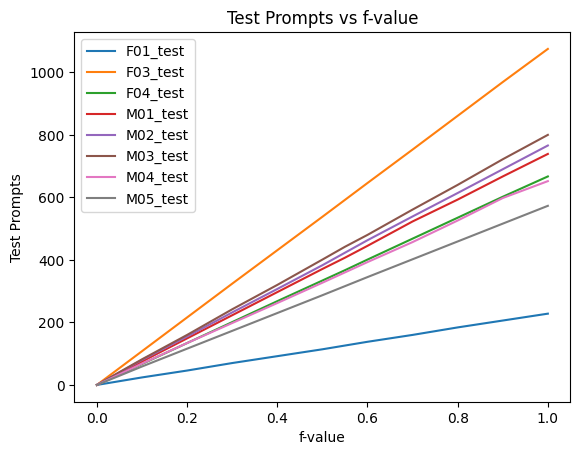

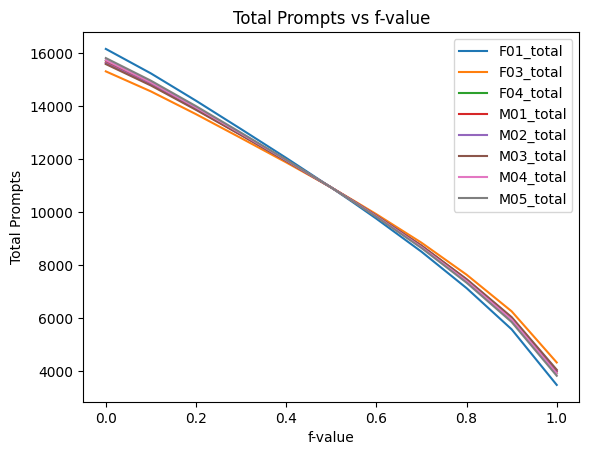

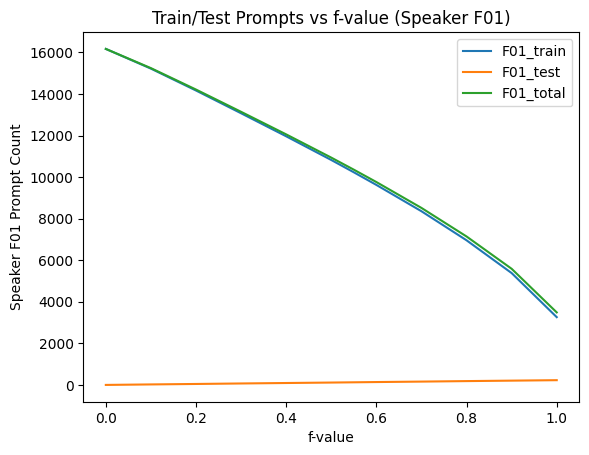

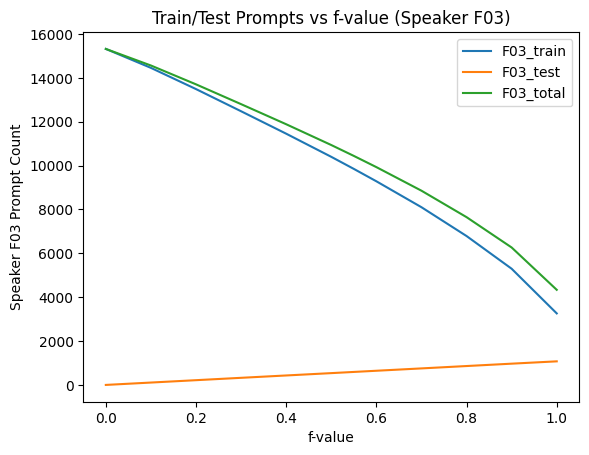

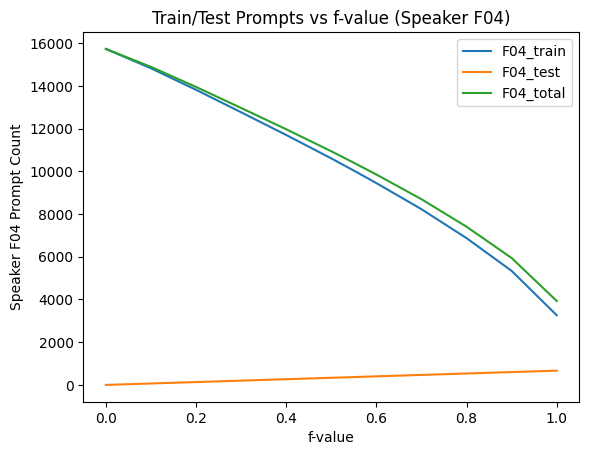

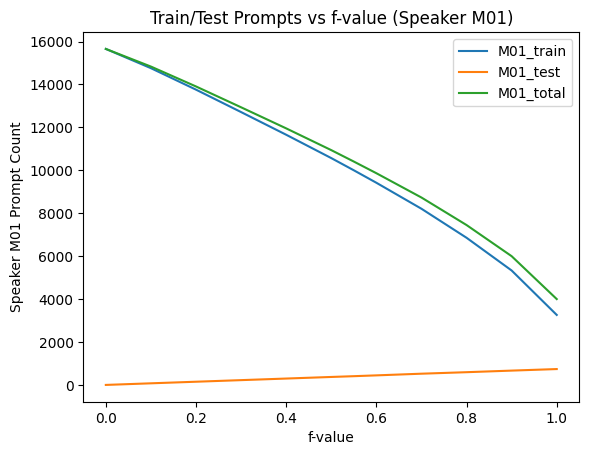

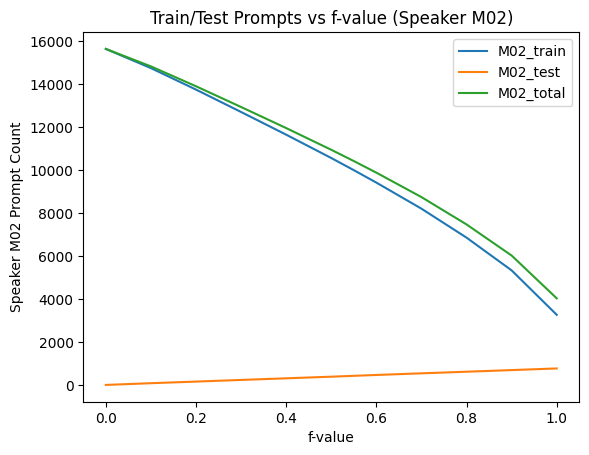

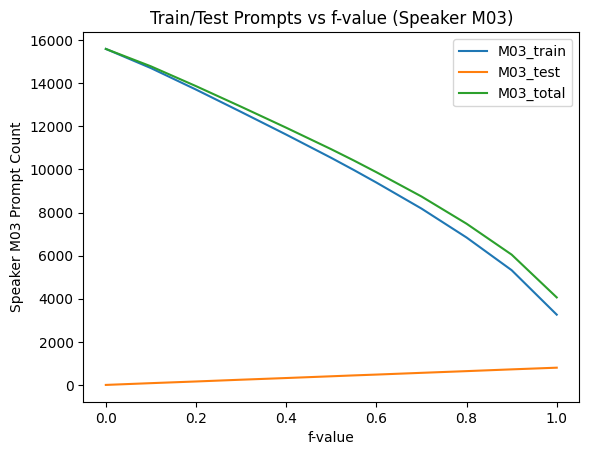

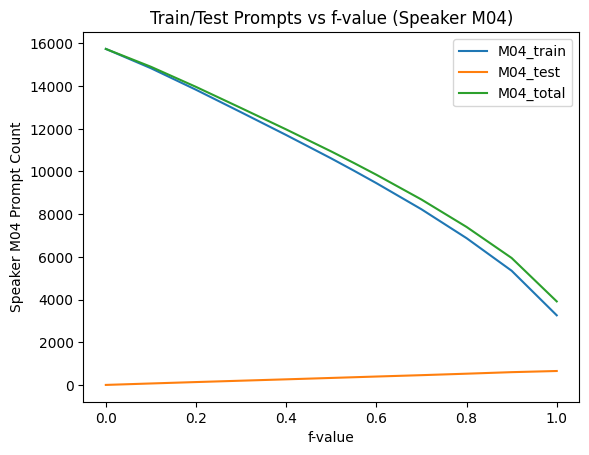

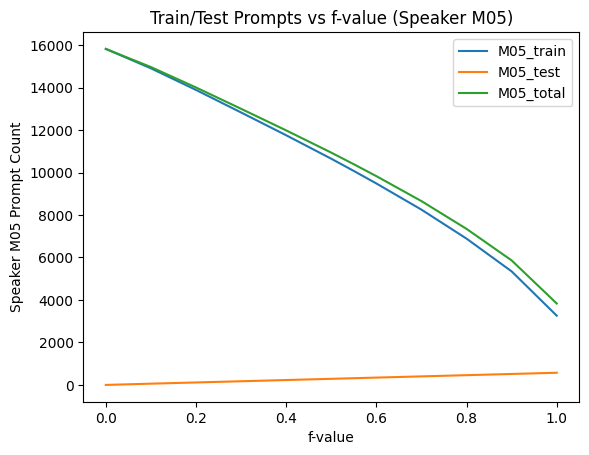

In [26]:
import matplotlib.pyplot as plt

# Plot train prompts vs f-value
x = experiment_df['f_value']

plt.title('Train Prompts vs f-value')
plt.xlabel('f-value')
plt.ylabel('Train Prompts')

for speaker in ['F01', 'F03', 'F04', 'M01', 'M02', 'M03', 'M04', 'M05']:
    y = experiment_df[f"{speaker}_train"]
    label = f"{speaker}_train"
    plt.plot(x, y, label=label)

plt.legend()
plt.show()

# Plot test prompts vs f-value
x = experiment_df['f_value']

plt.title('Test Prompts vs f-value')
plt.xlabel('f-value')
plt.ylabel('Test Prompts')

for speaker in ['F01', 'F03', 'F04', 'M01', 'M02', 'M03', 'M04', 'M05']:
    y = experiment_df[f"{speaker}_test"]
    label = f"{speaker}_test"
    plt.plot(x, y, label=label)

plt.legend()
plt.show()

# Plot total prompts vs f-value
x = experiment_df['f_value']

plt.title('Total Prompts vs f-value')
plt.xlabel('f-value')
plt.ylabel('Total Prompts')

for speaker in ['F01', 'F03', 'F04', 'M01', 'M02', 'M03', 'M04', 'M05']:
    y = experiment_df[f"{speaker}_total"]
    label = f"{speaker}_total"
    plt.plot(x, y, label=label)

plt.legend()
plt.show()

# Train/Test/Total vs f-value, per speaker
for speaker in ['F01', 'F03', 'F04', 'M01', 'M02', 'M03', 'M04', 'M05']:
    x = experiment_df['f_value']

    plt.title(f'Train/Test Prompts vs f-value (Speaker {speaker})')
    plt.xlabel('f-value')
    plt.ylabel(f'Speaker {speaker} Prompt Count')

    for label in ['train', 'test', 'total']:
        y = experiment_df[f"{speaker}_{label}"]
        label = f"{speaker}_{label}"
        plt.plot(x, y, label=label)

    plt.legend()
    plt.show()


In [27]:
# Save the .csv file
experiment_df.to_csv('results/experiment_summary.csv')